In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import re

%matplotlib inline


In [183]:
transaction = pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
product = pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
customer =  pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 1 - Retail Case Study\Customer.csv")

### Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [185]:
customer_final1 = pd.merge(transaction,product , left_on= ['prod_cat_code','prod_subcat_code'], right_on=['prod_cat_code','prod_sub_cat_code'], how='inner')
customer_final1.drop(columns= 'prod_sub_cat_code',inplace= True)
customer_final = pd.merge(customer_final1, customer , left_on='cust_id', right_on='customer_Id', how='inner')
customer_final.drop(columns= 'customer_Id',inplace= True)

In [187]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"], dayfirst= True , format= 'mixed')

In [189]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0


In [980]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [193]:
customer_final.duplicated().sum()

13

In [195]:
customer_final.drop_duplicates(inplace=True)

In [197]:
customer_final.duplicated().sum()

0

### Q2. Prepare a summary report for the merged data set.
a. Get the column names and their corresponding data types 

b. Top/Bottom 10 observations

c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

d. Frequency tables for all the categorical variables

In [216]:
## (a.)

customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [218]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [1217]:
## (b.)

customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,1979-11-27,F,3.0


In [222]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0


In [224]:
## (c.)

customer_final.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_id,23040.0,50069552219.162758,3268991.0,24933147151.25,50091880127.5,75326317773.5,99987549630.0,28980615382.236916
cust_id,23040.0,271021.880252,266783.0,268935.0,270980.5,273114.25,275265.0,2431.573668
tran_date,23040,2012-08-09 05:59:11.250000128,2011-01-25 00:00:00,2011-11-02 18:00:00,2012-08-11 00:00:00,2013-05-17 00:00:00,2014-02-28 00:00:00,NaN
prod_subcat_code,23040.0,6.148785,1.0,3.0,5.0,10.0,12.0,3.726197
prod_cat_code,23040.0,3.763498,1.0,2.0,4.0,5.0,6.0,1.677091
Qty,23040.0,2.435764,-5.0,1.0,3.0,4.0,5.0,2.264326
Rate,23040.0,637.094965,-1499.0,312.0,710.0,1109.0,1500.0,621.727374
Tax,23040.0,248.677488,7.35,98.28,199.08,365.7675,787.5,187.188311
total_amt,23040.0,2109.865226,-8270.925,762.45,1756.95,3570.255,8287.5,2505.610295
DOB,23040,1981-07-14 18:04:37.500000,1970-01-02 00:00:00,1975-09-25 12:00:00,1981-06-16 00:00:00,1987-06-05 06:00:00,1992-12-29 00:00:00,NaN


In [226]:
### (d.)

customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


### Q3. Generate histograms for all continuous variables and frequency bars for categorical variables.

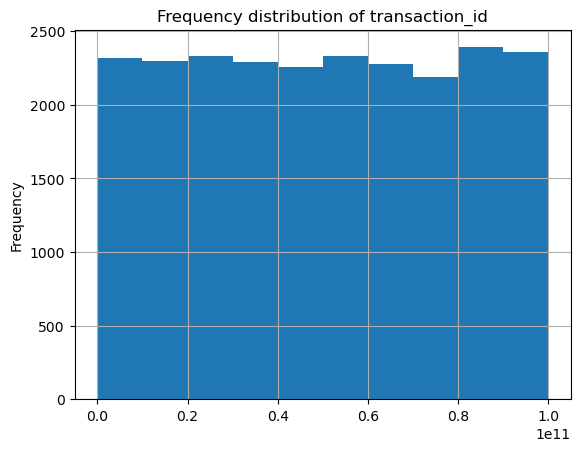

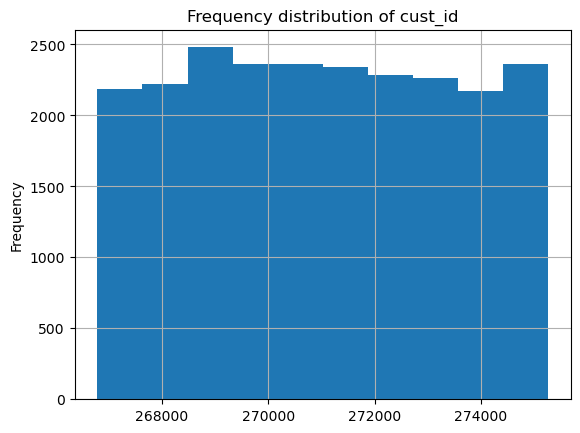

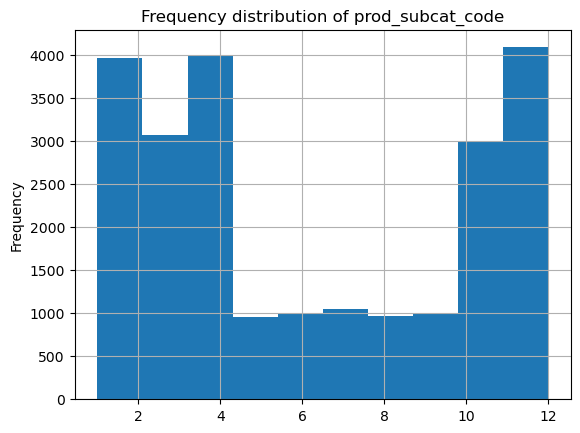

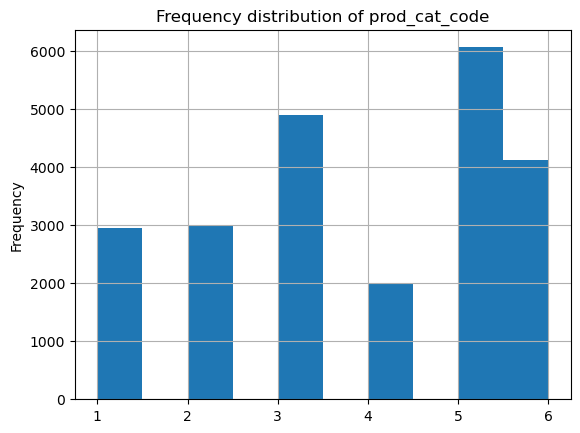

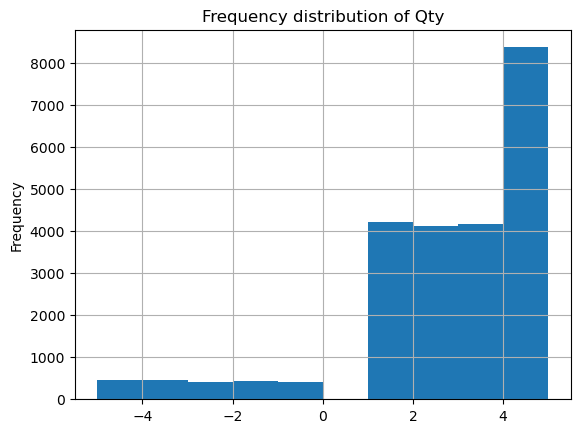

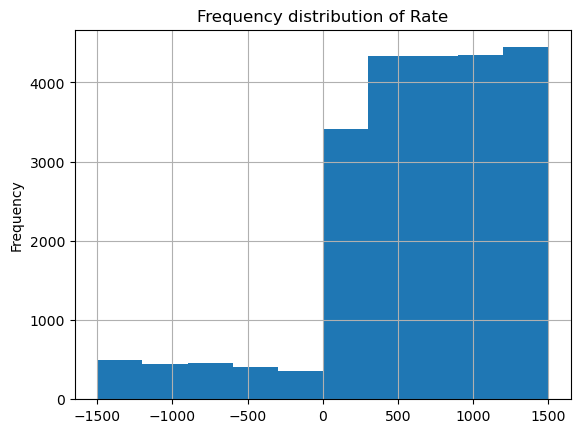

transaction_id      None
cust_id             None
prod_subcat_code    None
prod_cat_code       None
Qty                 None
Rate                None
dtype: object

In [308]:
## Histograms for all continuous variables:

def hist(x):
    plt.title('Frequency distribution of '+ x.name)
    x.hist()
    plt.ylabel('Frequency')
    plt.show()
customer_final.select_dtypes('int64','float64').apply(hist)

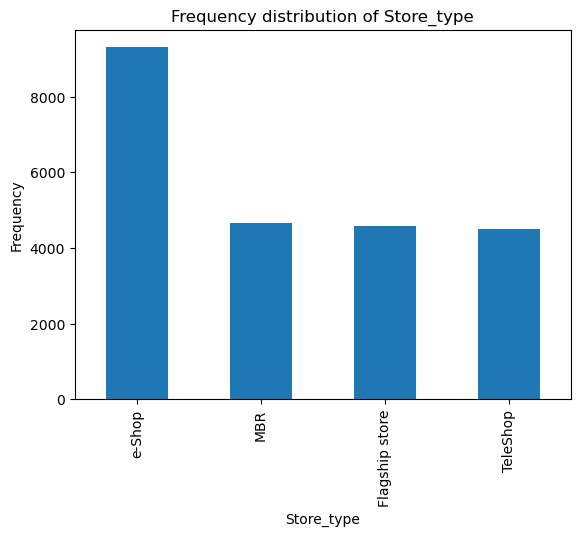

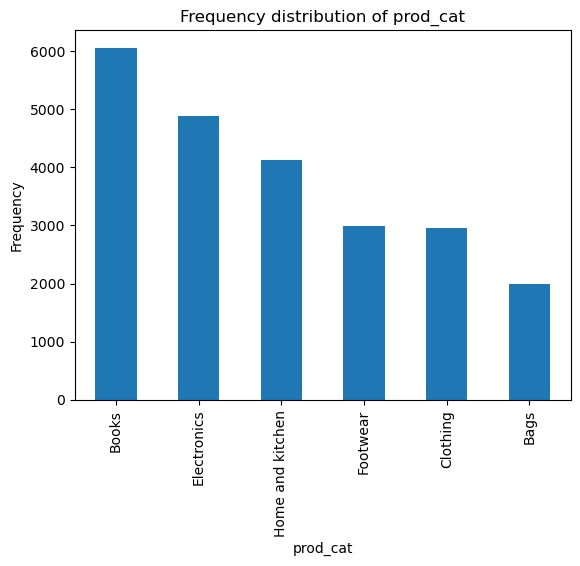

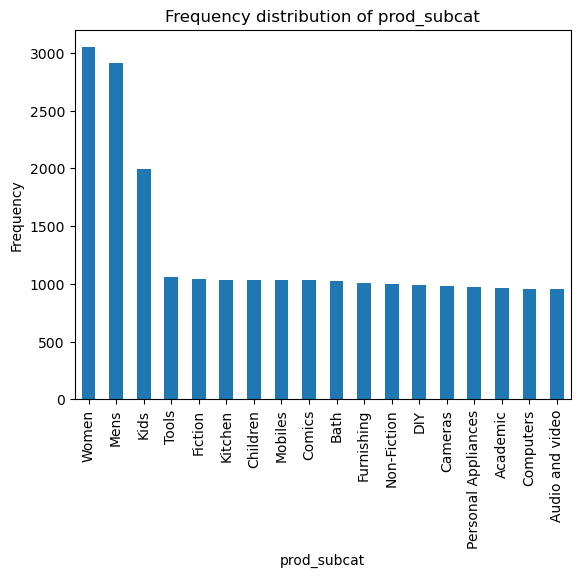

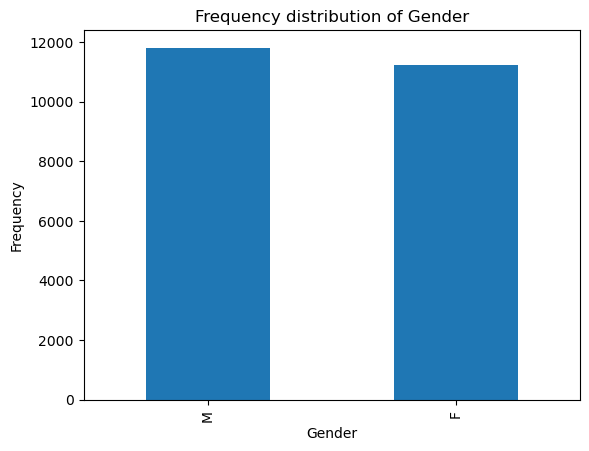

Store_type     None
prod_cat       None
prod_subcat    None
Gender         None
dtype: object

In [1262]:
## frequency bars for categorical variables:

def bars(x):
    plt.title('Frequency distribution of '+ x.name )
    x.value_counts().plot(kind='bar')
    plt.ylabel('Frequency')
    plt.show()
customer_final.select_dtypes('object').apply(bars)

### Q4. Calculate the following information using the merged dataset :
a. Time period of the available transaction data

b. Count of transactions where the total amount of transaction was negative

In [686]:
### (a.)

ma = dt.datetime.strftime(customer_final.tran_date.max(), '%d-%m-%Y')
mi = dt.datetime.strftime(customer_final.tran_date.min(), '%d-%m-%Y')
print('Time period of the available transaction data is from '+ mi +' to ' + ma)

Time period of the available transaction data is from 25-01-2011 to 28-02-2014


In [709]:
### (b.)

negative= customer_final.loc[customer_final.total_amt < 0 , "transaction_id"].count()
print("Count of transactions where the total amount of transaction was negative is",negative)

Count of transactions where the total amount of transaction was negative is 2164


### Q5. Analyze which product categories are more popular among females vs male customers.

In [1215]:
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_gender_sorted= product_gender.sort_values(by=['Gender','Qty'] , ascending= [True, False]).reset_index(drop=True)

top_female = product_gender_sorted[product_gender_sorted['Gender'] == 'F'].head(3)
top_male = product_gender_sorted[product_gender_sorted['Gender'] == 'M'].head(3)

print("Top 3 product categories among females:\n", top_female.to_string(index=False))
print("\nTop 3 product categories among males:\n", top_male.to_string(index=False))

Top 3 product categories among females:
 Gender         prod_cat  Qty
     F            Books 7080
     F      Electronics 5832
     F Home and kitchen 4898

Top 3 product categories among males:
 Gender         prod_cat  Qty
     M            Books 7587
     M      Electronics 6486
     M Home and kitchen 5051


#### From the above output:
Products that are popular among males are:

* Books

* Electronics
* Home and kitchen

Products that are popular among females are:

* Bags
* Footwear

### Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [1196]:
max_customer= customer_final.groupby('city_code')[['cust_id']].count().sort_values(by='cust_id', ascending= False).reset_index()
max_customer['cust_id']= round(max_customer.cust_id/max_customer.cust_id.sum()*100,2)
per_customer = max_customer.head(1)
print('city code', per_customer.city_code.to_string(index=False) , 'has the maximun customers & the percentage of customers from that city is :',per_customer.cust_id.to_string(index=False),'%')

city code 4.0 has the maximun customers & the percentage of customers from that city is : 10.52 %


### Q7. Which store type sells the maximum products by value and by quantity?

In [1257]:
s1= customer_final.groupby(customer_final.Store_type )[['total_amt','Qty']].sum().reset_index()
max_byvalue = s1.sort_values(by='total_amt',ascending= False , ignore_index= True).head(1)
max_byqty = s1.sort_values(by='Qty',ascending= False , ignore_index= True).head(1)
print(max_byvalue.Store_type.to_string(index= False) ,'Store sells the maximum products by VALUE which is :',max_byvalue.total_amt.to_string(index= False))
print(max_byqty.Store_type.to_string(index= False) ,'Store sells the maximum products by QUANTITY which is :',max_byqty.Qty.to_string(index= False))

e-Shop Store sells the maximum products by VALUE which is : 19842623.125
e-Shop Store sells the maximum products by QUANTITY which is : 22790


### Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [1394]:
ct1 = pd.crosstab(index= customer_final.Store_type , columns= customer_final.prod_cat, values= customer_final.total_amt , aggfunc='sum')
total_amount = ct1.loc['Flagship store',['Electronics','Clothing']].sum()
print("The total amount earned from the Electronics & Clothing categories from Flagship Stores is : ",total_amount)

The total amount earned from the Electronics & Clothing categories from Flagship Stores is :  3409559.27


### Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [1424]:
tot_amount = customer_final[(customer_final.prod_cat=='Electronics') & (customer_final.Gender=='M')].total_amt.sum()
print('the total amount earned from Male customers under the Electronics category is : ',tot_amount)

the total amount earned from Male customers under the Electronics category is :  5711351.62


### Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [1587]:
cust1 = customer_final[customer_final.total_amt>0 ]
ct2 = cust1.groupby([cust1.cust_id])[['transaction_id']].nunique().rename(columns={'transaction_id':'No_of_transaction'}).reset_index()
total_cust = ct2[ct2.No_of_transaction > 10].cust_id.count()
print(total_cust,"Customers have more than 10 unique transactions")

6 Customers have more than 10 unique transactions


### Q11. For all customers aged between 25 - 35, find out:
a. What was the total amount spent for “Electronics” and “Books” product categories?

b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [1669]:
### (a.)

customer_final['Age']=pd.Timestamp.today().year-customer_final.DOB.apply(lambda x :x.year)

In [1753]:
total_spend= customer_final[((customer_final.Age >= 25) & (customer_final.Age <= 35)) & 
                ((customer_final.prod_cat == 'Electronics') | (customer_final.prod_cat == 'Books'))]['total_amt'].sum()
print('The total amount spent for “Electronics” and “Books” product categories for customers aged between 25 - 35 is : ', total_spend)

The total amount spent for “Electronics” and “Books” product categories for customers aged between 25 - 35 is :  2794995.84


In [1755]:
### (b.)

tot_spend= customer_final[((customer_final.Age >= 25) & (customer_final.Age <= 35)) & 
                            ((customer_final.tran_date >='2014-01-01')& (customer_final.tran_date <= '2014-03-01'))]['total_amt'].sum()
print('The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 for customers aged between 25 - 35 is : ', total_spend)

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 for customers aged between 25 - 35 is :  2794995.84
